In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

In [3]:
df = pd.read_csv('../web_scraping/upwork_jobs.csv')

# Project value by jobs

In [15]:
# Clean data
df_unique = df.drop_duplicates(subset=['Title', 'Link'])
df_unique.loc['Price'] = df_unique['Price'].replace('[\\$]|,', '', regex=True).astype(float)

/var/folders/c0/gvf6nyxn7f94v5f6y77krgkw0000gn/T/ipykernel_24378/2879395185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.loc['Price'] = df_unique['Price'].replace('[\\$]|,', '', regex=True).astype(float)


In [72]:
# Count summary statistics
price = df_unique.groupby('Category')['price'].agg(
    Mean='mean', 
    Median='median', 
    Count='count'
).reset_index()

price_sorted = price.sort_values(by='Mean', ascending=False)['Category']

# price

In [73]:
# Sort summary statistics
price_summary = price.melt(
    id_vars='Category',
    var_name='Statistic',
    value_name='Value'
)

price_summary['Category'] = pd.Categorical(
    price_summary['Category'],
    categories=price_sorted,
    ordered=True
)

# price_summary

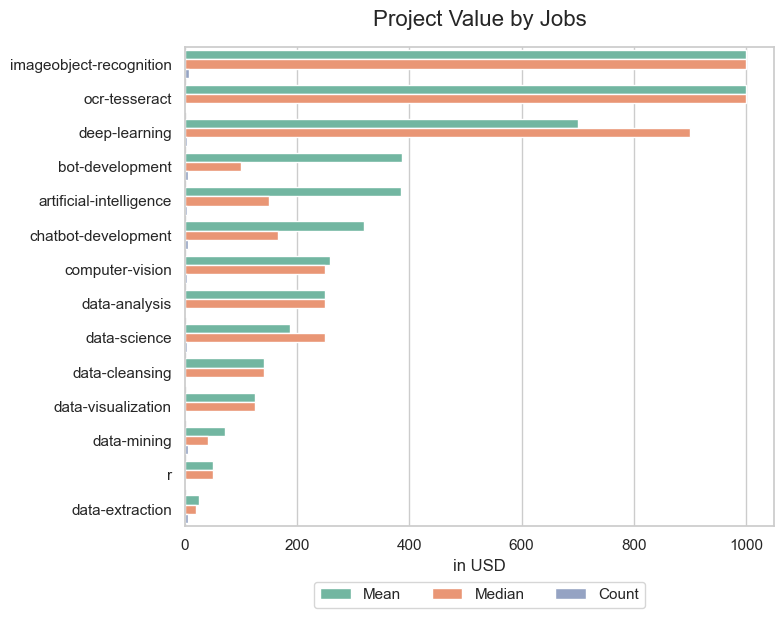

In [74]:
# Display bar graph
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
sns.barplot(
    data=price_summary,
    y='Category',
    x='Value',
    hue='Statistic',
    palette='Set2'
)

plt.title(
    'Project Value by Jobs', 
    fontsize=16,
    pad=15
)
plt.xlabel('in USD')
plt.ylabel('')
plt.tight_layout()

plt.legend(
    title='',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=3
)

# Most needed skills

In [107]:
# Join skills variable
skills_text = ','.join(df['Skills'].astype(str).tolist())
skills = [skill.strip().lower() 
          for skill in re.split(r'[,\s]', skills_text)
          if skill.strip()]

# skills

In [108]:
# Generate biwords
biwords = []
for i in range(len(skills) - 1):
    pair = sorted([skills[i], skills[i + 1]])
    biwords.append(' '.join(pair))

biword_freq = Counter(biwords)

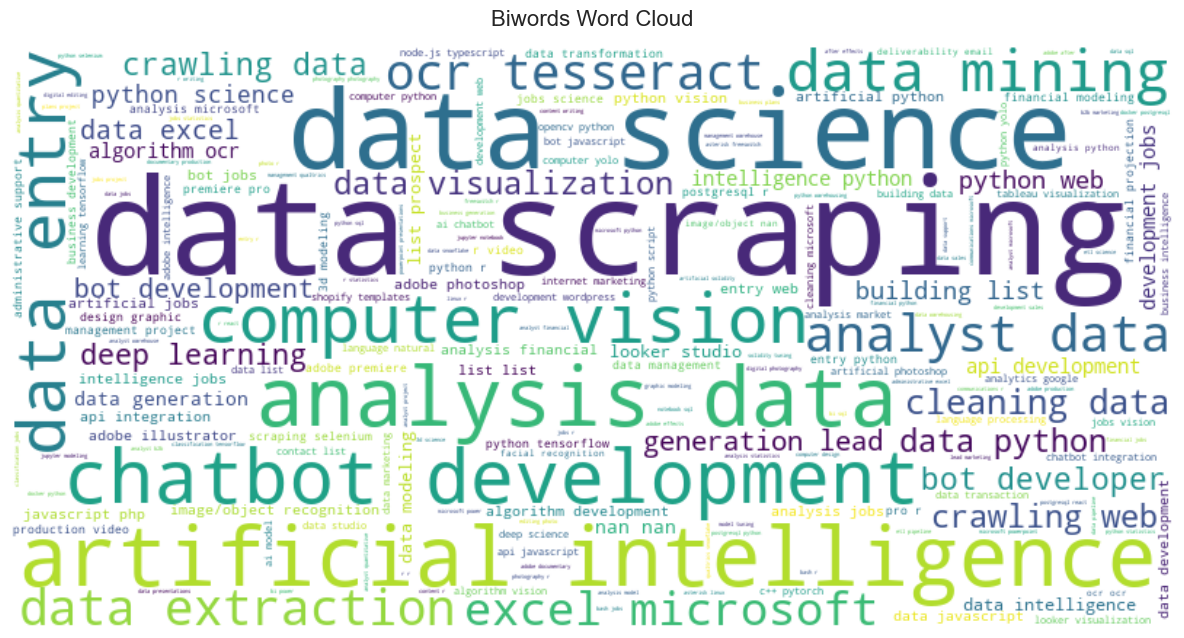

In [112]:
# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white'
).generate_from_frequencies(biword_freq)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Biwords Word Cloud", fontsize=16, pad=15)
plt.tight_layout()
plt.show()